In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb


In [2]:
df=pd.read_csv('./Data_Train.csv')
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [3]:
df.shape

(10683, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [6]:
df.dropna(inplace=True)
df.shape

(10682, 11)

In [7]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [8]:
df['Date_of_Journey'].value_counts()

Date_of_Journey
18/05/2019    504
6/06/2019     503
21/05/2019    497
9/06/2019     495
12/06/2019    493
9/05/2019     484
21/03/2019    423
15/05/2019    405
27/05/2019    382
27/06/2019    355
24/06/2019    351
1/06/2019     342
3/06/2019     333
15/06/2019    328
24/03/2019    323
6/03/2019     308
27/03/2019    299
24/05/2019    286
6/05/2019     281
1/05/2019     277
12/05/2019    259
1/04/2019     257
3/03/2019     218
9/03/2019     200
15/03/2019    162
18/03/2019    156
01/03/2019    152
12/03/2019    142
9/04/2019     125
3/04/2019     110
21/06/2019    109
18/06/2019    105
09/03/2019    102
6/04/2019     100
03/03/2019     97
06/03/2019     95
27/04/2019     94
24/04/2019     92
3/05/2019      90
15/04/2019     89
21/04/2019     82
18/04/2019     67
12/04/2019     63
1/03/2019      47
Name: count, dtype: int64

In [9]:

df['Journey_Day']=pd.to_datetime(df['Date_of_Journey'],format='%d/%m/%Y').dt.day

In [10]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9
10679,Air India,27/04/2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229,27
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648,1


In [11]:

df['Journey_Month']=pd.to_datetime(df['Date_of_Journey'],format='%d/%m/%Y').dt.month
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,4
10679,Air India,27/04/2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229,27,4
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648,1,3


In [12]:

df['Journey_Weekday']=pd.to_datetime(df['Date_of_Journey'],format='%d/%m/%Y').dt.day_name()

In [13]:

journey_day=df[['Journey_Weekday']]
journey_day_ohe=pd.get_dummies(journey_day,drop_first=True)
journey_day_ohe.shape[1]

6

In [14]:

df.drop(columns=['Date_of_Journey'],inplace=True)
df.shape

(10682, 13)

In [15]:
df

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Weekday
0,IndiGo,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,Sunday
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,Wednesday
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,Sunday
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,Sunday
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,4,Tuesday
10679,Air India,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4,Saturday
10680,Jet Airways,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229,27,4,Saturday
10681,Vistara,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648,1,3,Friday


In [16]:

df['Dep_Time'].value_counts()

Dep_Time
18:55    233
17:00    227
07:05    205
10:00    203
07:10    202
        ... 
16:25      1
01:35      1
21:35      1
04:15      1
03:00      1
Name: count, Length: 222, dtype: int64

In [17]:

df['Dep_Hour']=pd.to_datetime(df['Dep_Time']).dt.hour
df['Dep_Min']=pd.to_datetime(df['Dep_Time']).dt.minute
df

C:\Users\mrmkc\AppData\Local\Temp\ipykernel_11764\2773884496.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dep_Hour']=pd.to_datetime(df['Dep_Time']).dt.hour
C:\Users\mrmkc\AppData\Local\Temp\ipykernel_11764\2773884496.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dep_Min']=pd.to_datetime(df['Dep_Time']).dt.minute


,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Weekday,Dep_Hour,Dep_Min
0,IndiGo,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,Sunday,22,20
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,Wednesday,5,50
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,Sunday,9,25
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,Sunday,18,5
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,Friday,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,4,Tuesday,19,55
10679,Air India,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4,Saturday,20,45
10680,Jet Airways,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229,27,4,Saturday,8,20
10681,Vistara,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648,1,3,Friday,11,30


In [18]:

df.drop(columns=['Dep_Time'],inplace=True)
df.shape

(10682, 14)

In [19]:

df['Arrival_Time'].value_counts()

Arrival_Time
19:00           423
21:00           360
19:15           333
16:10           154
12:35           122
               ... 
00:25 02 Jun      1
08:55 13 Mar      1
11:05 19 May      1
12:30 22 May      1
21:20 13 Mar      1
Name: count, Length: 1343, dtype: int64

In [20]:

df['Arrival_Time'].value_counts()
df['Arr_Hour']=pd.to_datetime(df['Arrival_Time']).dt.hour
df['Arr_Min']=pd.to_datetime(df['Arrival_Time']).dt.minute
df

C:\Users\mrmkc\AppData\Local\Temp\ipykernel_11764\1837432658.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Arr_Hour']=pd.to_datetime(df['Arrival_Time']).dt.hour
C:\Users\mrmkc\AppData\Local\Temp\ipykernel_11764\1837432658.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Arr_Min']=pd.to_datetime(df['Arrival_Time']).dt.minute


,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Weekday,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min
0,IndiGo,Banglore,New Delhi,BLR ? DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,Sunday,22,20,1,10
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,13:15,7h 25m,2 stops,No info,7662,1,5,Wednesday,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,Sunday,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,23:30,5h 25m,1 stop,No info,6218,12,5,Sunday,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,21:35,4h 45m,1 stop,No info,13302,1,3,Friday,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU ? BLR,22:25,2h 30m,non-stop,No info,4107,9,4,Tuesday,19,55,22,25
10679,Air India,Kolkata,Banglore,CCU ? BLR,23:20,2h 35m,non-stop,No info,4145,27,4,Saturday,20,45,23,20
10680,Jet Airways,Banglore,Delhi,BLR ? DEL,11:20,3h,non-stop,No info,7229,27,4,Saturday,8,20,11,20
10681,Vistara,Banglore,New Delhi,BLR ? DEL,14:10,2h 40m,non-stop,No info,12648,1,3,Friday,11,30,14,10


In [21]:

df.drop(columns=['Arrival_Time'],inplace=True)
df.shape

(10682, 15)

In [22]:
duration = list(df["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [23]:

df["Duration_hours"] = duration_hours
df["Duration_mins"] = duration_mins

In [24]:

df.drop(["Duration"], axis = 1, inplace = True)

In [25]:

df['Airline'].value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

In [26]:
df=df[df['Airline']!='Trujet']

<AxesSubplot: xlabel='count', ylabel='Airline'>

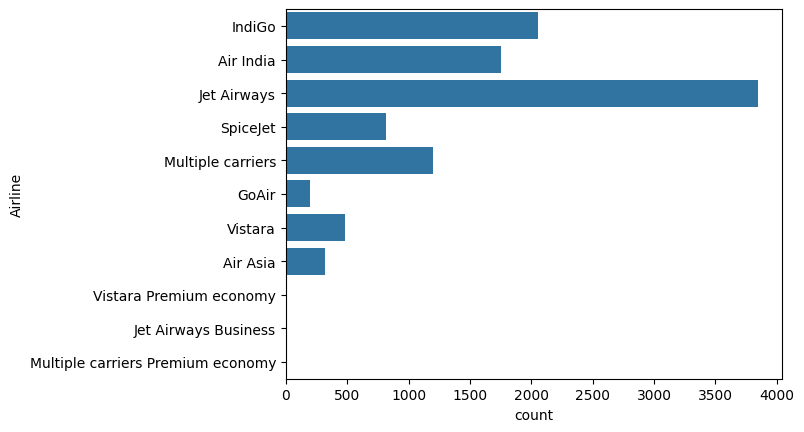

In [27]:

sb.countplot(df,y='Airline')

C:\Users\mrmkc\AppData\Roaming\Python\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


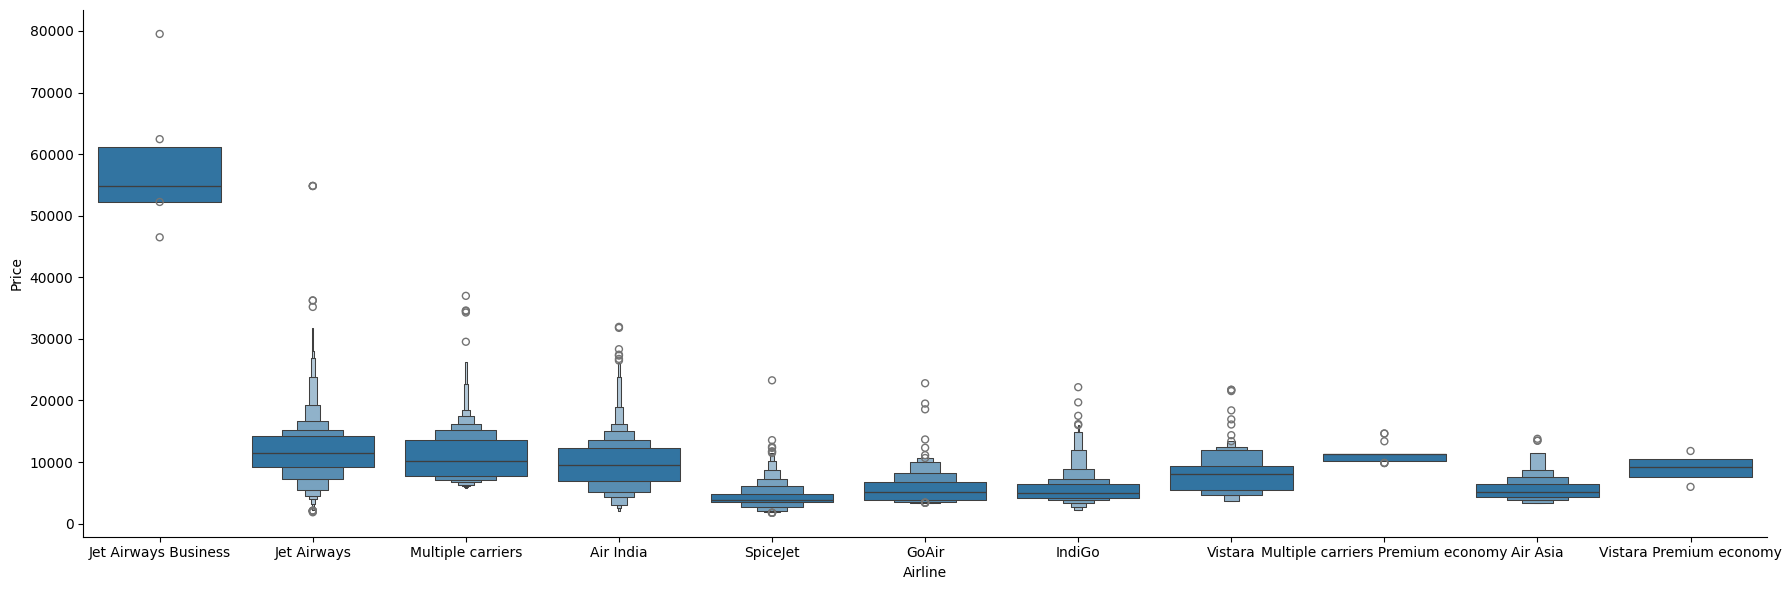

In [28]:

sb.catplot(df.sort_values('Price',ascending=False),x='Airline',y='Price',kind='boxen',height=6,aspect=3)
plt.show()

In [29]:

airlines=df[['Airline']]
airline_ohe=pd.get_dummies(airlines,drop_first=True)
airline_ohe.shape[1]

10

In [30]:

df['Source'].value_counts()

Source
Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       696
Chennai      381
Name: count, dtype: int64

C:\Users\mrmkc\AppData\Roaming\Python\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


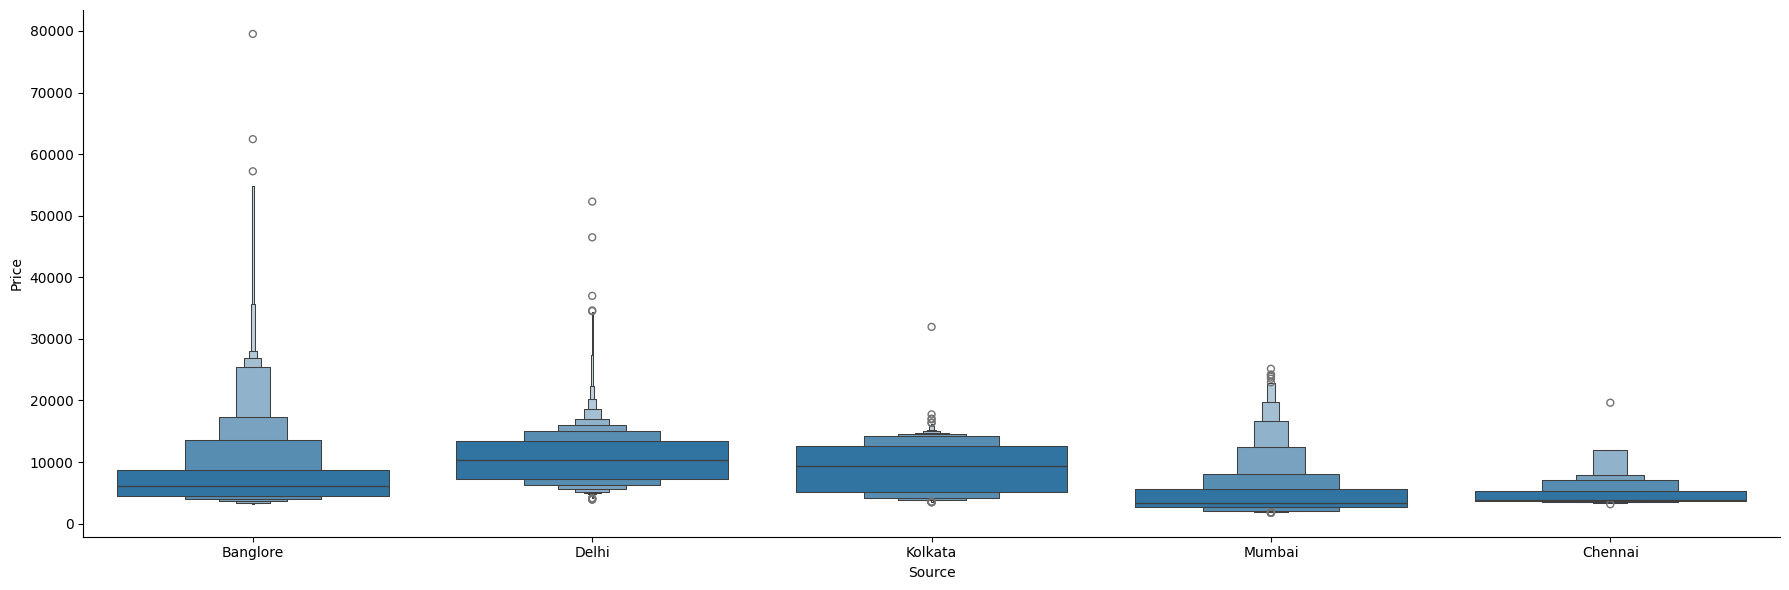

In [31]:

sb.catplot(df.sort_values('Price',ascending=False),x='Source',y='Price',kind='boxen',height=6,aspect=3)
plt.show()

In [32]:

source=df[['Source']]
source_ohe=pd.get_dummies(source,drop_first=True)
source_ohe.shape[1]

4

In [33]:

df['Destination'].value_counts()

Destination
Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     696
Kolkata       381
Name: count, dtype: int64

C:\Users\mrmkc\AppData\Roaming\Python\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


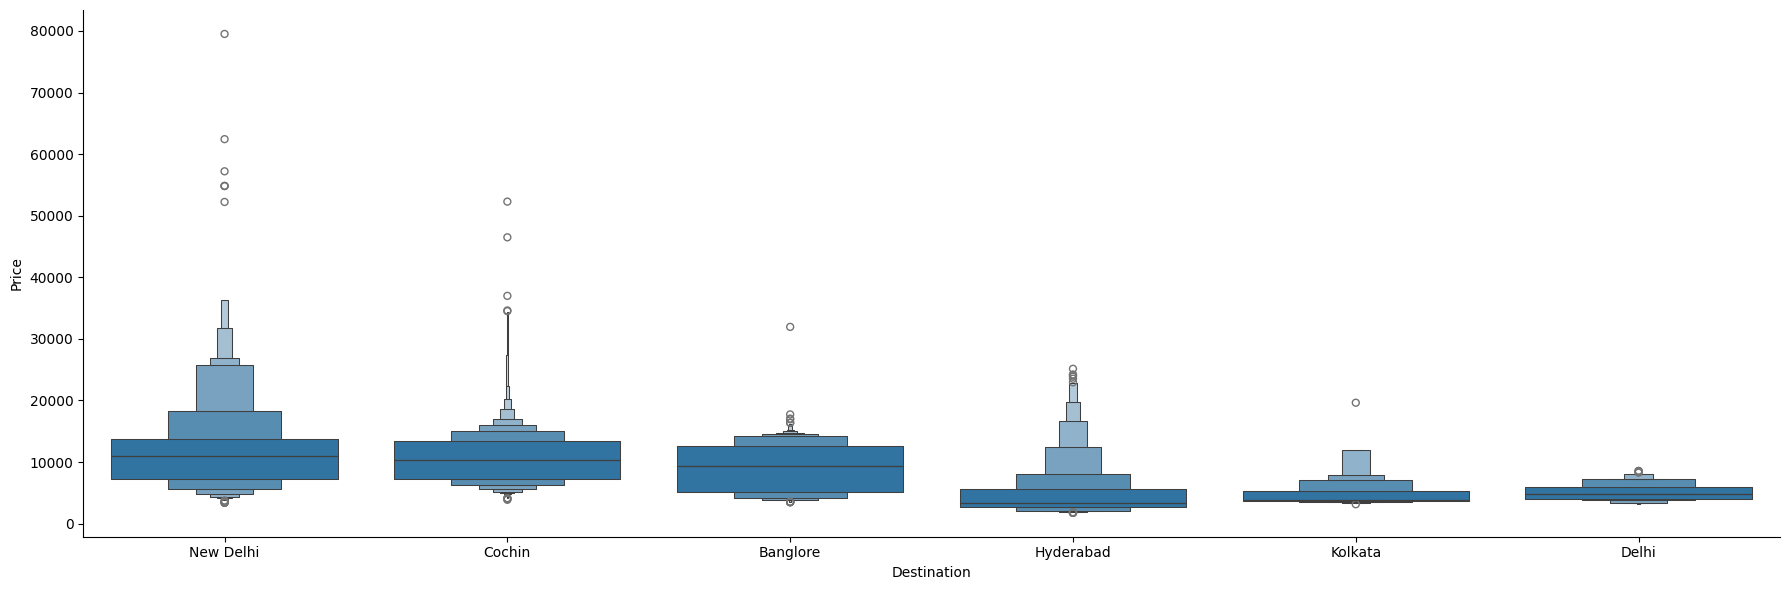

In [34]:

sb.catplot(df.sort_values('Price',ascending=False),x='Destination',y='Price',kind='boxen',height=6,aspect=3)
plt.show()

In [35]:

dest=df[['Destination']]
dest_ohe=pd.get_dummies(dest,drop_first=True)
dest_ohe.shape[1]

5

In [36]:

df.drop(columns=['Additional_Info','Route'],inplace=True)
df

C:\Users\mrmkc\AppData\Local\Temp\ipykernel_11764\1550885445.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Additional_Info','Route'],inplace=True)


,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Journey_Weekday,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,Sunday,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,Wednesday,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,Sunday,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,Sunday,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,Friday,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,non-stop,4107,9,4,Tuesday,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,non-stop,4145,27,4,Saturday,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,non-stop,7229,27,4,Saturday,8,20,11,20,3,0
10681,Vistara,Banglore,New Delhi,non-stop,12648,1,3,Friday,11,30,14,10,2,40


In [37]:

df['Total_Stops'].value_counts()

Total_Stops
1 stop      5624
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: count, dtype: int64

C:\Users\mrmkc\AppData\Roaming\Python\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


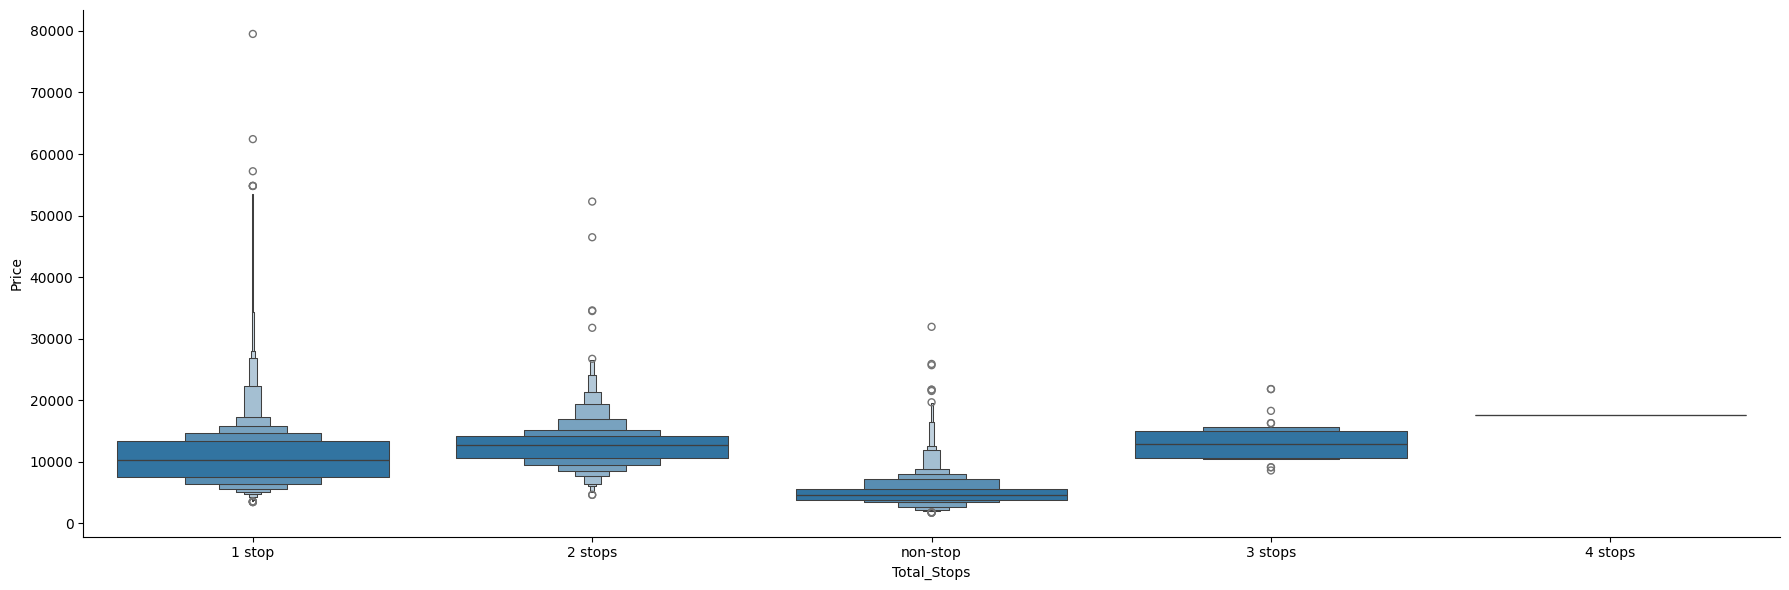

In [38]:

sb.catplot(df.sort_values('Price',ascending=False),x='Total_Stops',y='Price',kind='boxen',height=6,aspect=3)
plt.show()

In [39]:

df.replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4},inplace=True)
df

C:\Users\mrmkc\AppData\Local\Temp\ipykernel_11764\1999578135.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4},inplace=True)
C:\Users\mrmkc\AppData\Local\Temp\ipykernel_11764\1999578135.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4},inplace=True)


,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Journey_Weekday,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,Sunday,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,Wednesday,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,Sunday,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,Sunday,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,Friday,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,4107,9,4,Tuesday,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,0,4145,27,4,Saturday,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,0,7229,27,4,Saturday,8,20,11,20,3,0
10681,Vistara,Banglore,New Delhi,0,12648,1,3,Friday,11,30,14,10,2,40


In [40]:

df_new = pd.concat([df,source_ohe,dest_ohe,airline_ohe,journey_day_ohe],axis=1)
df_new.drop(columns=['Source','Destination','Airline','Journey_Weekday'],axis=1,inplace=True)
df_new

,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min,Duration_hours,Duration_mins,...,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Journey_Weekday_Monday,Journey_Weekday_Saturday,Journey_Weekday_Sunday,Journey_Weekday_Thursday,Journey_Weekday_Tuesday,Journey_Weekday_Wednesday
0,0.0,3897.0,24.0,3.0,22.0,20.0,1.0,10.0,2.0,50.0,...,False,False,False,False,False,False,True,False,False,False
1,2.0,7662.0,1.0,5.0,5.0,50.0,13.0,15.0,7.0,25.0,...,False,False,False,False,False,False,False,False,False,True
2,2.0,13882.0,9.0,6.0,9.0,25.0,4.0,25.0,19.0,0.0,...,False,False,False,False,False,False,True,False,False,False
3,1.0,6218.0,12.0,5.0,18.0,5.0,23.0,30.0,5.0,25.0,...,False,False,False,False,False,False,True,False,False,False
4,1.0,13302.0,1.0,3.0,16.0,50.0,21.0,35.0,4.0,45.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10679,0.0,4145.0,27.0,4.0,20.0,45.0,23.0,20.0,2.0,35.0,...,False,False,False,False,False,True,False,False,False,False
10680,0.0,7229.0,27.0,4.0,8.0,20.0,11.0,20.0,3.0,0.0,...,False,False,False,False,False,True,False,False,False,False
10681,0.0,12648.0,1.0,3.0,11.0,30.0,14.0,10.0,2.0,40.0,...,False,False,True,False,False,False,False,False,False,False
10682,2.0,11753.0,9.0,5.0,10.0,55.0,19.0,15.0,8.0,20.0,...,False,False,False,False,False,False,False,True,False,False


In [41]:
df_new.dropna(inplace=True)
df_new.shape

(10681, 35)

In [42]:
df_new.shape

(10681, 35)

In [43]:
df_new.columns

Index(['Total_Stops', 'Price', 'Journey_Day', 'Journey_Month', 'Dep_Hour',
       'Dep_Min', 'Arr_Hour', 'Arr_Min', 'Duration_hours', 'Duration_mins',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Journey_Weekday_Monday', 'Journey_Weekday_Saturday',
       'Journey_Weekday_Sunday', 'Journey_Weekday_Thursday',
       'Journey_Weekday_Tuesday', 'Journey_Weekday_Wednesday'],
      dtype='object')

In [44]:
x=df_new.loc[:, ['Total_Stops','Journey_Day', 'Journey_Month', 'Dep_Hour',
       'Dep_Min', 'Arr_Hour', 'Arr_Min', 'Duration_hours', 'Duration_mins',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
        'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Journey_Weekday_Monday', 'Journey_Weekday_Saturday',
       'Journey_Weekday_Sunday', 'Journey_Weekday_Thursday',
       'Journey_Weekday_Tuesday', 'Journey_Weekday_Wednesday']]

x.shape

(10681, 34)

In [45]:
y=df_new.iloc[:,1]
y.shape

(10681,)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10681 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10681 non-null  object
 1   Source           10681 non-null  object
 2   Destination      10681 non-null  object
 3   Total_Stops      10681 non-null  int64 
 4   Price            10681 non-null  int64 
 5   Journey_Day      10681 non-null  int32 
 6   Journey_Month    10681 non-null  int32 
 7   Journey_Weekday  10681 non-null  object
 8   Dep_Hour         10681 non-null  int32 
 9   Dep_Min          10681 non-null  int32 
 10  Arr_Hour         10681 non-null  int32 
 11  Arr_Min          10681 non-null  int32 
 12  Duration_hours   10681 non-null  int64 
 13  Duration_mins    10681 non-null  int64 
dtypes: int32(6), int64(4), object(4)
memory usage: 1.2+ MB


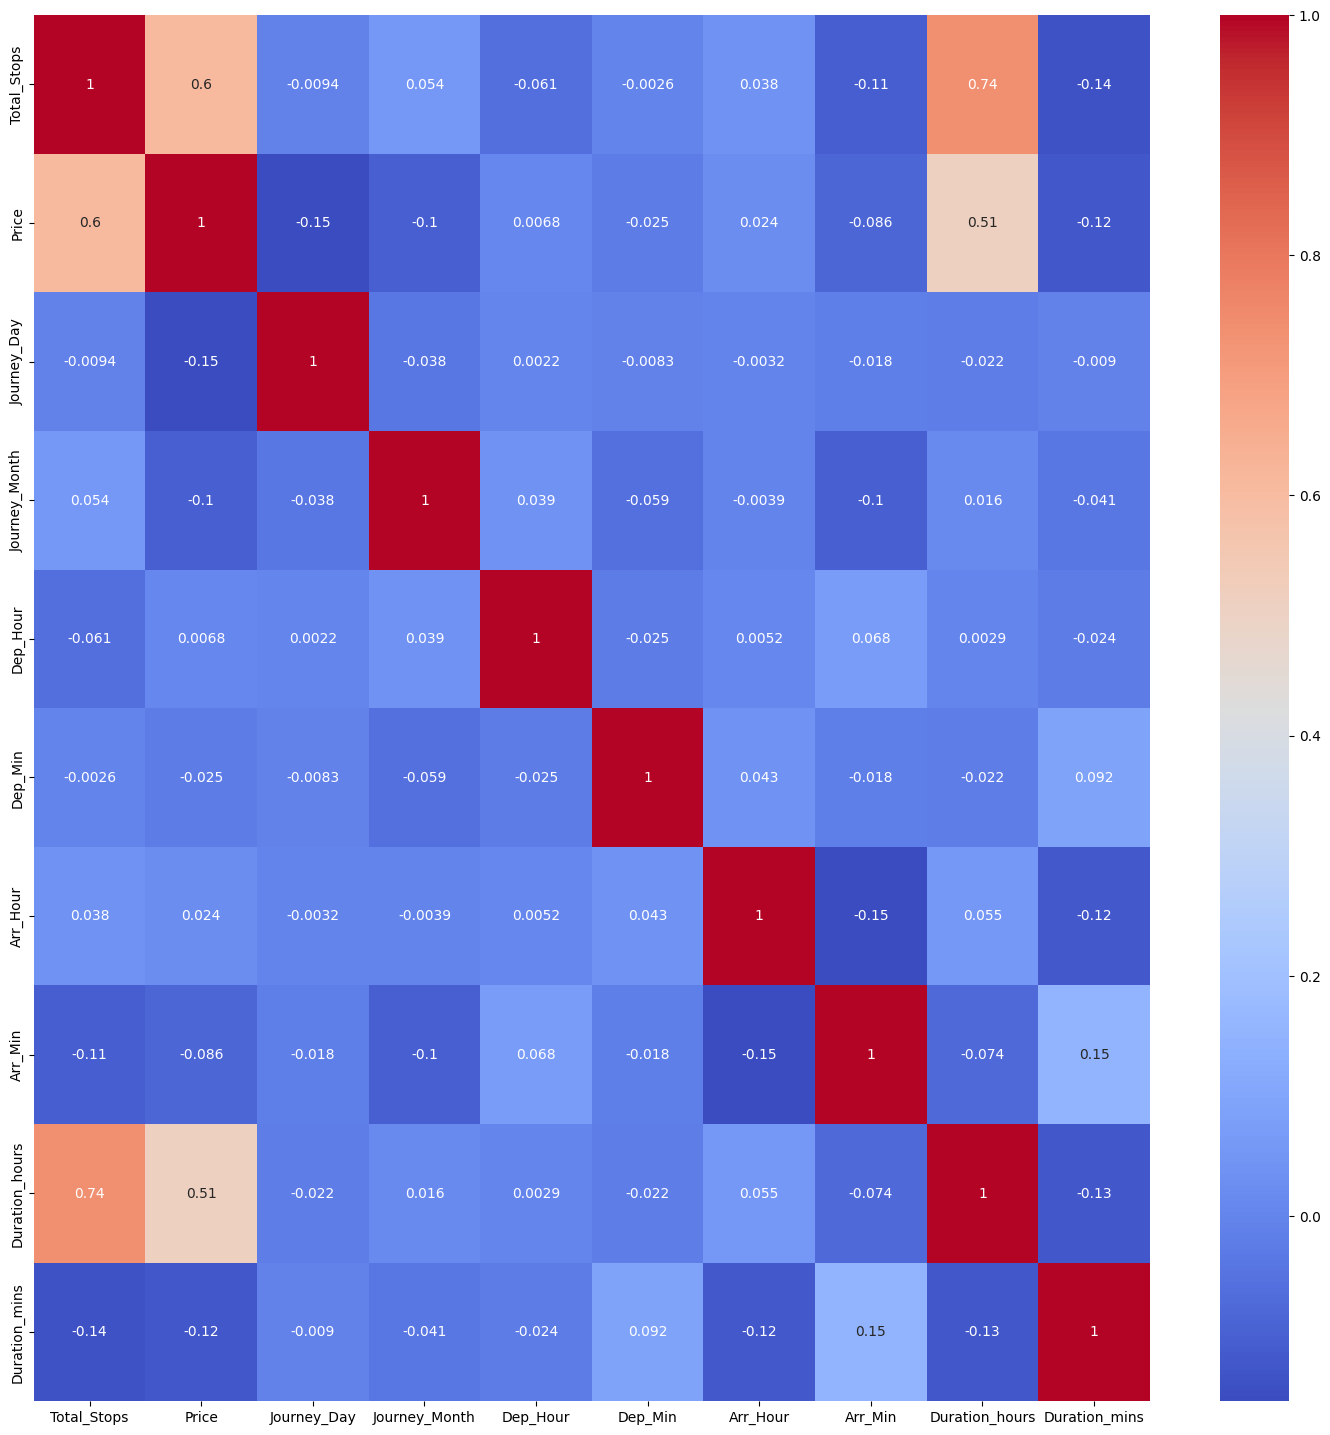

In [71]:
# Finds correlation between Independent and dependent attributes
df_numeric = df.select_dtypes(include=['int64', 'int32','float64'])
plt.figure(figsize = (18,18))
sb.heatmap(df_numeric.corr(), annot = True, cmap = "coolwarm")

plt.show()

















In [221]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(x, y)

ExtraTreesRegressor()

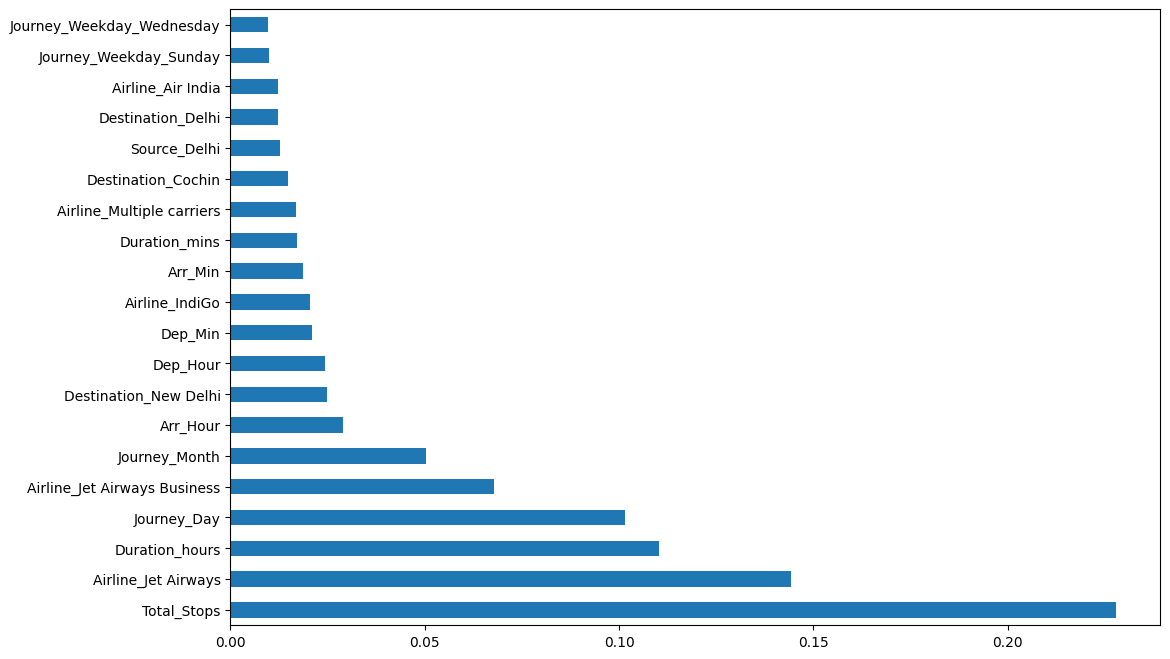

In [222]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=x.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [223]:
importances = selection.feature_importances_
indices = np.argsort(importances)[-20:][::-1]
feature_names = x.columns if isinstance(x, pd.DataFrame) else [f"Feature {i}" for i in range(x.shape[1])]
top_20_features = [feature_names[i] for i in indices]
top_20_features

['Total_Stops',
 'Airline_Jet Airways',
 'Duration_hours',
 'Journey_Day',
 'Airline_Jet Airways Business',
 'Journey_Month',
 'Arr_Hour',
 'Destination_New Delhi',
 'Dep_Hour',
 'Dep_Min',
 'Airline_IndiGo',
 'Arr_Min',
 'Duration_mins',
 'Airline_Multiple carriers',
 'Destination_Cochin',
 'Source_Delhi',
 'Destination_Delhi',
 'Airline_Air India',
 'Journey_Weekday_Sunday',
 'Journey_Weekday_Wednesday']

In [46]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [47]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(x_train, y_train)

RandomForestRegressor()

In [48]:
y_pred_reg_rf = reg_rf.predict(x_test)

In [49]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print(mean_squared_error(y_test, y_pred_reg_rf))
print(mean_absolute_error(y_test, y_pred_reg_rf))
print(r2_score(y_test, y_pred_reg_rf))
print(np.sqrt(mean_squared_error(y_test, y_pred_reg_rf)))

4034853.652577581
1145.0467247522022
0.8083021174998748
2008.6945144988028


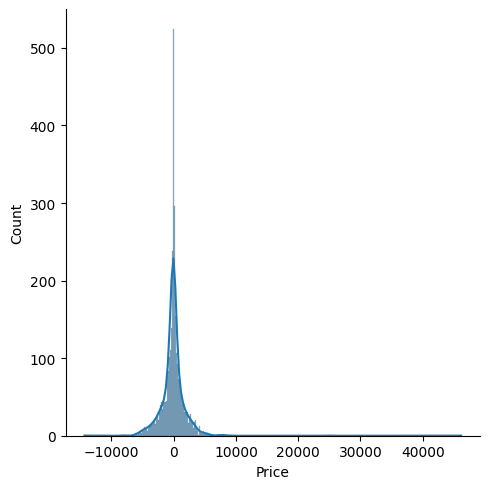

In [50]:
sb.displot(y_test-y_pred_reg_rf,kde=True)
plt.show()

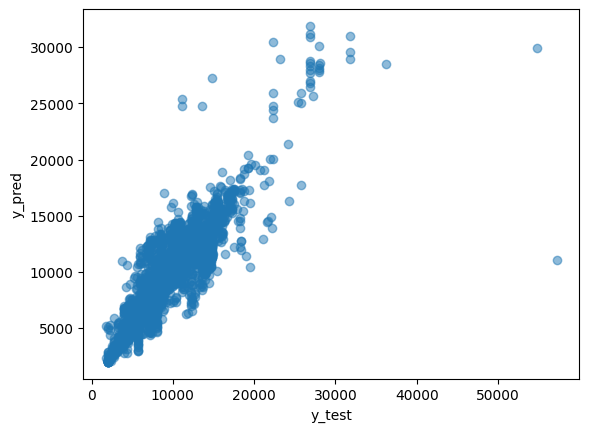

In [51]:
plt.scatter(y_test, y_pred_reg_rf, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [230]:
reg_rf_t20 = RandomForestRegressor()
x_train_imp=x_train.loc[:,top_20_features]
x_train_imp
x_test_imp
reg_rf_t20.fit(x_train_imp,y_train)
y_pred_reg_rf_t20=reg_rf_t20.predict(x_test_imp)

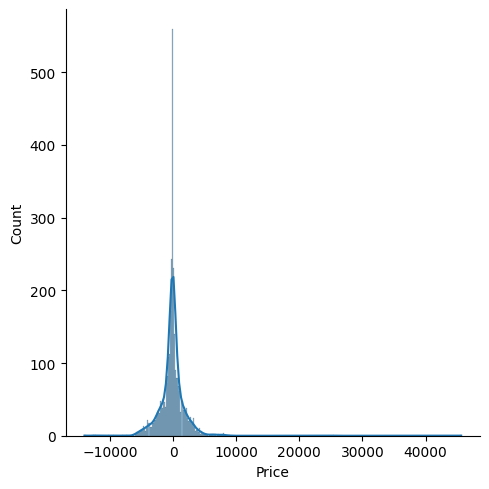

In [231]:
sb.displot(y_test-y_pred_reg_rf_t20,kde=True)
plt.show()

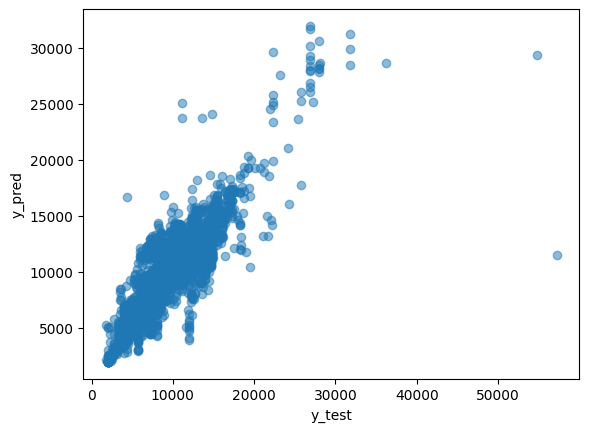

In [232]:
plt.scatter(y_test, y_pred_reg_rf_t20, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [233]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print(mean_squared_error(y_test, y_pred_reg_rf_t20))
print(mean_absolute_error(y_test, y_pred_reg_rf_t20))
print(r2_score(y_test, y_pred_reg_rf_t20))
print(np.sqrt(mean_squared_error(y_test, y_pred_reg_rf_t20)))

4236719.018676926
1188.3226513136542
0.7987113946228168
2058.3291813208416


In [52]:
from sklearn.model_selection import RandomizedSearchCV
import joblib

In [53]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['log2', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [54]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [55]:
rf_hyper = RandomizedSearchCV(estimator =RandomForestRegressor() , param_distributions = random_grid,scoring='neg_mean_absolute_error', n_iter = 30, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [56]:
rf_hyper.fit(x_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.9s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   1.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.7s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.9s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.9s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   1.0s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.9s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_est

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=30, n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['log2', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_absolute_error',
                   verbose=2)

In [57]:
rf_hyper.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 20}

In [58]:
y_pred_rf_hyper = rf_hyper.predict(x_test)

<Figure size 800x800 with 0 Axes>

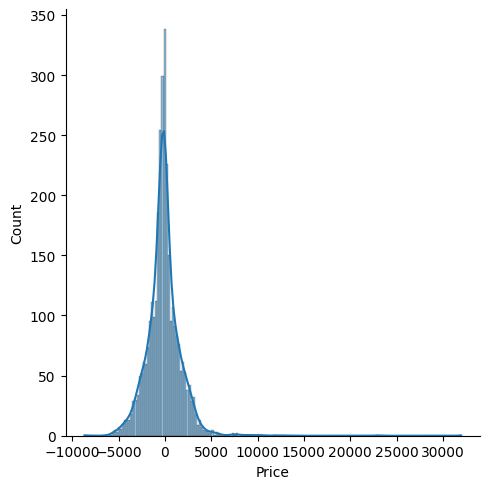

In [59]:
plt.figure(figsize = (8,8))
sb.displot(y_test-y_pred_rf_hyper,kde=True)
plt.show()

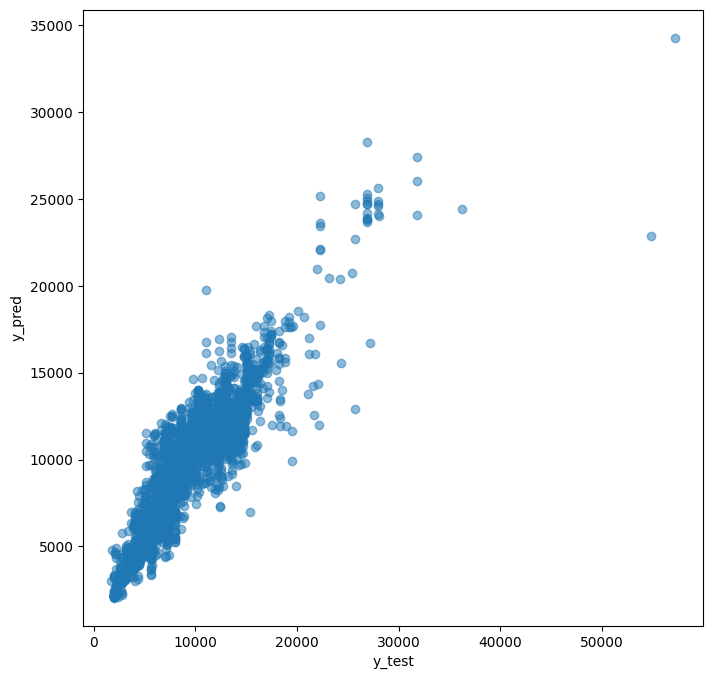

In [60]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, y_pred_rf_hyper, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [61]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print(mean_squared_error(y_test, y_pred_rf_hyper))
print(mean_absolute_error(y_test, y_pred_rf_hyper))
print(r2_score(y_test, y_pred_rf_hyper))
print(np.sqrt(mean_squared_error(y_test, y_pred_rf_hyper)))

3588942.433004199
1256.5342430226515
0.8294875789652885
1894.4504303370409


In [62]:
import pickle

In [63]:
pickle.dump(reg_rf, open('rf_reg_flight_new.pkl', 'wb'))

In [244]:
rf_hyper_t20 = RandomizedSearchCV(estimator =RandomForestRegressor() , param_distributions = random_grid,scoring='neg_mean_absolute_error', n_iter = 30, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [245]:
rf_hyper_t20.fit(x_train_imp,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   1.7s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   1.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   1.7s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   1.7s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   1.7s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   2.2s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   2.2s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_est

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=30, n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['log2', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_absolute_error',
                   verbose=2)

In [246]:
rf_hyper_t20.best_params_


{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 20}

In [248]:
y_pred_rf_hyper_t20 = rf_hyper_t20.predict(x_test_imp)


<Figure size 800x800 with 0 Axes>

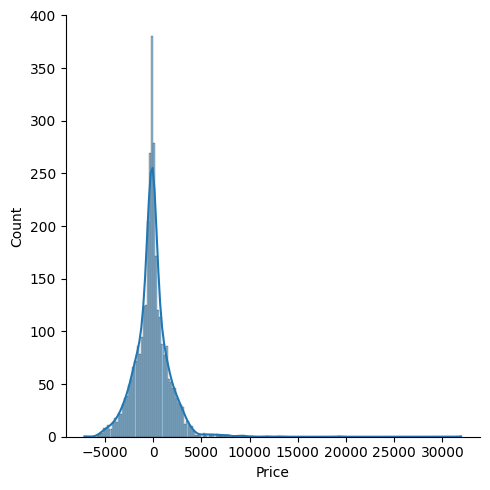

In [249]:
plt.figure(figsize = (8,8))
sb.displot(y_test-y_pred_rf_hyper_t20,kde=True)
plt.show()

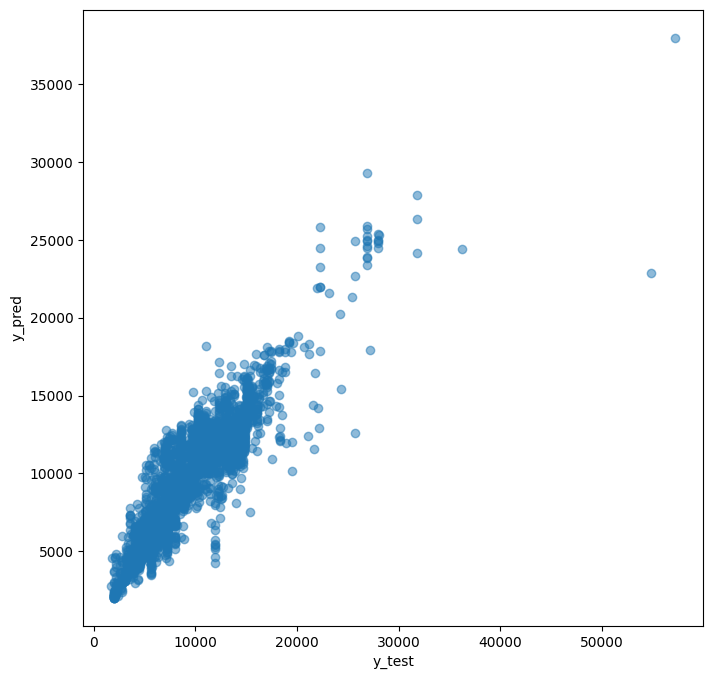

In [250]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, y_pred_rf_hyper_t20, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [251]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print(mean_squared_error(y_test, y_pred_rf_hyper_t20))
print(mean_absolute_error(y_test, y_pred_rf_hyper_t20))
print(r2_score(y_test, y_pred_rf_hyper_t20))
print(np.sqrt(mean_squared_error(y_test, y_pred_rf_hyper_t20)))

3603471.2750971657
1239.6666570781533
0.8287973065281156
1898.281137001884


In [252]:
from sklearn.svm import SVR

In [253]:
svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr.fit(x_train, y_train)

SVR()

In [254]:
svr_pred=svr.predict(x_test)


<Figure size 800x800 with 0 Axes>

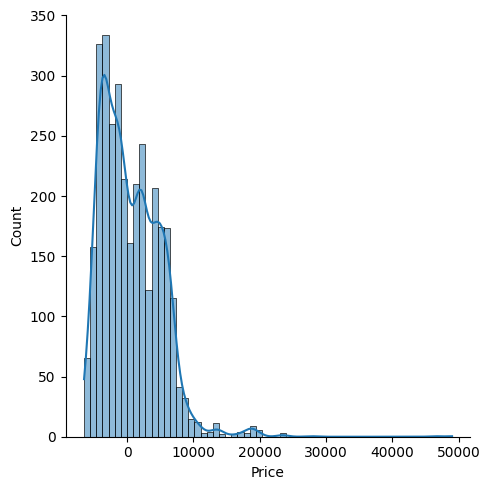

In [255]:
plt.figure(figsize = (8,8))
sb.displot(y_test-svr_pred,kde=True)
plt.show()


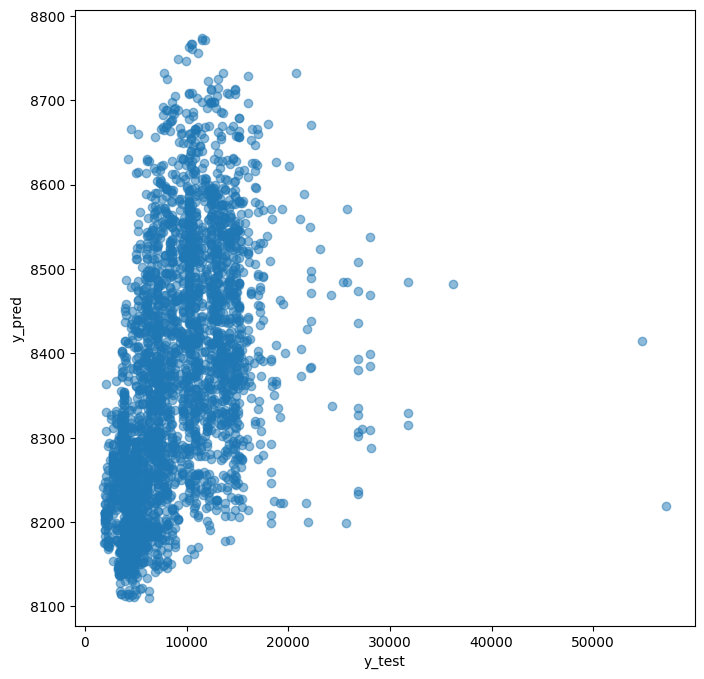

In [256]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, svr_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [64]:
from sklearn.ensemble import GradientBoostingRegressor
gbr_reg = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr_reg.fit(x_train, y_train)
gbr_reg_pred=gbr_reg.predict(x_test)

In [65]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print(mean_squared_error(y_test, gbr_reg_pred))
print(mean_absolute_error(y_test, gbr_reg_pred))
print(r2_score(y_test, gbr_reg_pred))
print(np.sqrt(mean_squared_error(y_test, gbr_reg_pred)))

4650716.067143079
1518.0661360245122
0.7790421911309964
2156.551892986366


In [66]:
param_grid = {
    'n_estimators': [100, 200, 300, 500,600,700,800,900],
    'learning_rate': [0.01, 0.05, 0.1, 0.15],
    'max_depth': [3, 4, 5, 6, 7],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 5, 10, 20],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'max_features': [ 'sqrt', 'log2'],
    'loss': ['squared_error', 'huber']
}

In [67]:
gbr_reg_hyp = RandomizedSearchCV(estimator=GradientBoostingRegressor(random_state=42), param_distributions=param_grid,n_iter = 30, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')

In [68]:
gbr_reg_hyp.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1,
                                                          0.15],
                                        'loss': ['squared_error', 'huber'],
                                        'max_depth': [3, 4, 5, 6, 7],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 5, 10, 20],
                                        'min_samples_split': [2, 5, 10, 20],
                                        'n_estimators': [100, 200, 300, 500,
                                                         600, 700, 800, 900],
                                        'subsample': [0.6, 0.7, 0.8, 0.9, 1.0]},
                   scoring='neg_mean_squared_error')

In [69]:
gbr_reg_hyp.best_params_

{'subsample': 1.0,
 'n_estimators': 600,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 4,
 'loss': 'huber',
 'learning_rate': 0.15}

In [70]:
y_pred_gbr_reg_hyp=gbr_reg_hyp.predict(x_test)

In [71]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print(mean_squared_error(y_test, y_pred_gbr_reg_hyp))
print(mean_absolute_error(y_test, y_pred_gbr_reg_hyp))
print(r2_score(y_test, y_pred_gbr_reg_hyp))
print(np.sqrt(mean_squared_error(y_test, y_pred_gbr_reg_hyp)))

3191815.936840568
1169.0768970164975
0.8483552542155739
1786.5654023406387


<Figure size 800x800 with 0 Axes>

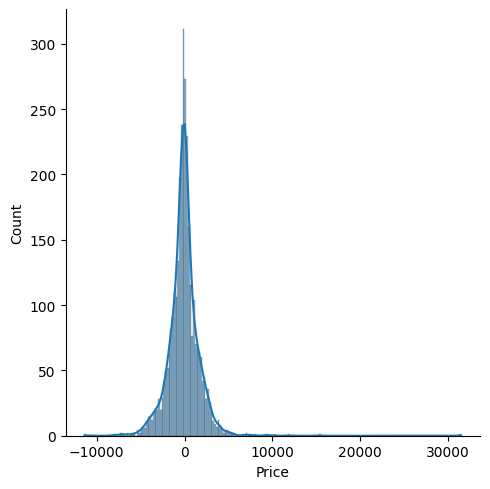

In [72]:
plt.figure(figsize = (8,8))
sb.displot(y_test-y_pred_gbr_reg_hyp,kde=True)
plt.show()


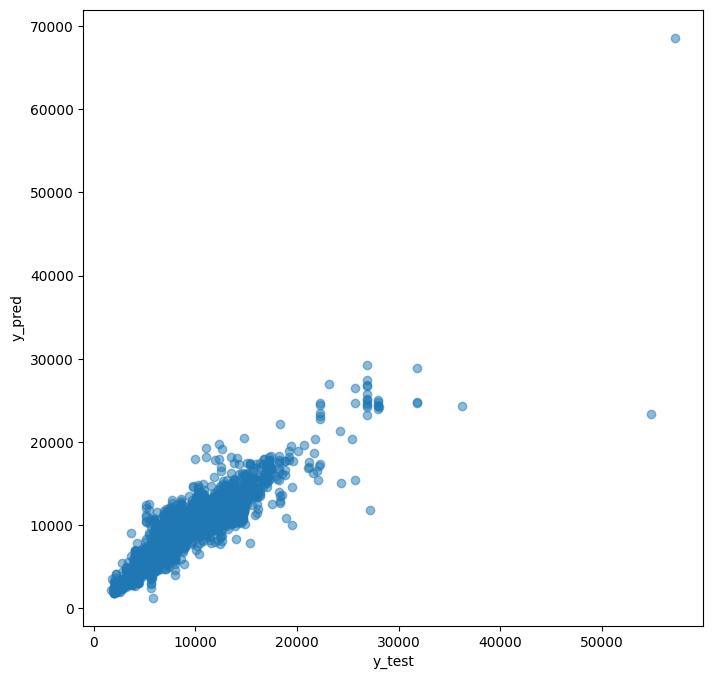

In [73]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, y_pred_gbr_reg_hyp, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [74]:
pickle.dump(gbr_reg_hyp,open('gb_reg_flight_new.pkl', 'wb'))

In [267]:
gbr_reg_t20 = RandomizedSearchCV(estimator=GradientBoostingRegressor(random_state=42), param_distributions=param_grid,n_iter = 30, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')


In [268]:
gbr_reg_t20.fit(x_train_imp, y_train)
gbr_reg_t20.best_params_


{'subsample': 0.6,
 'n_estimators': 900,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 5,
 'loss': 'huber',
 'learning_rate': 0.05}

In [269]:
y_pred_gbr_reg_t20=gbr_reg_t20.predict(x_test_imp)


In [270]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print(mean_squared_error(y_test, y_pred_gbr_reg_t20))
print(mean_absolute_error(y_test, y_pred_gbr_reg_t20))
print(r2_score(y_test, y_pred_gbr_reg_t20))
print(np.sqrt(mean_squared_error(y_test, y_pred_gbr_reg_t20)))


3333210.532763371
1186.29746869428
0.8416375273859907
1825.7082277196898


<Figure size 800x800 with 0 Axes>

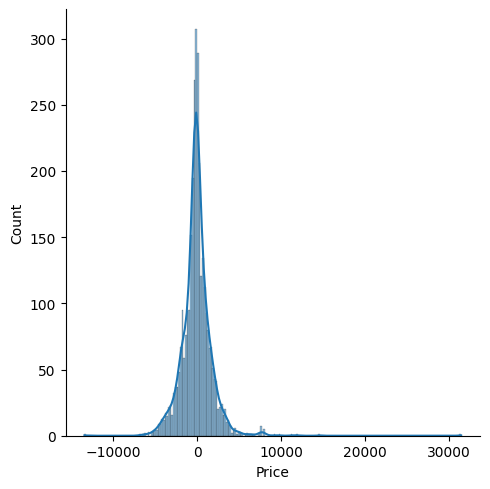

In [271]:
plt.figure(figsize = (8,8))
sb.displot(y_test-y_pred_gbr_reg_t20,kde=True)
plt.show()


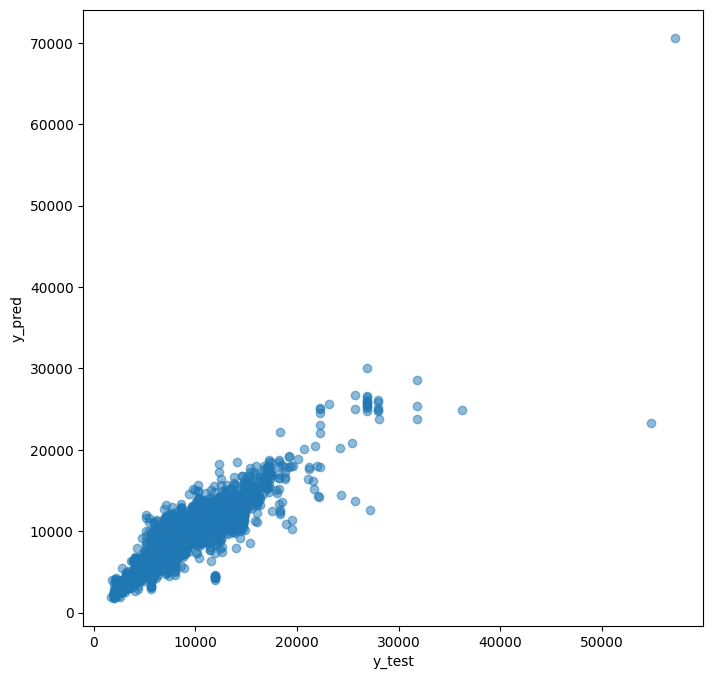

In [273]:
plt.figure(figsize = (8,8))
plt.scatter(y_test,y_pred_gbr_reg_t20, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [274]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(max_depth=5, random_state=42)
dtr.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [275]:
dtr_pred = dtr.predict(x_test)

In [276]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print(mean_squared_error(y_test,dtr_pred ))
print(mean_absolute_error(y_test, dtr_pred))
print(r2_score(y_test, dtr_pred))
print(np.sqrt(mean_squared_error(y_test, dtr_pred)))

7316812.923459041
1870.5490378279703
0.6523746175575373
2704.960798876583


In [277]:
param_grid_dtr = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': [None, 'sqrt', 'log2'],
    'criterion': ['squared_error', 'absolute_error']
}

In [279]:
dtr_hyp = RandomizedSearchCV(estimator=DecisionTreeRegressor(random_state=42), param_distributions=param_grid_dtr,n_iter=15, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')

In [280]:
dtr_hyp.fit(x_train, y_train)
# Getting the best parameters and models
dtr_hyp.best_params_

{'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': None,
 'max_depth': 15,
 'criterion': 'squared_error'}

In [281]:
y_pred_dtr_hyp=dtr_hyp .predict(x_test)

In [282]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print(mean_squared_error(y_test,y_pred_dtr_hyp ))
print(mean_absolute_error(y_test,y_pred_dtr_hyp))
print(r2_score(y_test,y_pred_dtr_hyp))
print(np.sqrt(mean_squared_error(y_test,y_pred_dtr_hyp)))

5635463.916072439
1276.6489780784846
0.7322563362547687
2373.913207358778


In [283]:
from sklearn.ensemble import ExtraTreesRegressor
etr = ExtraTreesRegressor(random_state=42)
etr.fit(x_train,y_train)
etr_pred=etr.predict(x_test)

In [284]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print(mean_squared_error(y_test,etr_pred ))
print(mean_absolute_error(y_test, etr_pred))
print(r2_score(y_test, etr_pred))
print(np.sqrt(mean_squared_error(y_test, etr_pred)))

4029397.381237231
1196.5738678627145
0.8085613476361706
2007.3358914833439


In [285]:
param_grid_etr = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

In [286]:
etr_hyp = RandomizedSearchCV(estimator=ExtraTreesRegressor(random_state=42), param_distributions=param_grid_etr, n_iter=20,cv=5, n_jobs=1, scoring='neg_mean_squared_error')

In [287]:
etr_hyp.fit(x_train, y_train)
# Getting the best parameters and models
etr_hyp.best_params_

{'n_estimators': 100,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': None,
 'bootstrap': False}

In [288]:
y_pred_etr_hyp=etr_hyp.predict(x_test)

In [289]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print(mean_squared_error(y_test,y_pred_etr_hyp ))
print(mean_absolute_error(y_test,y_pred_etr_hyp))
print(r2_score(y_test,y_pred_etr_hyp))
print(np.sqrt(mean_squared_error(y_test, y_pred_etr_hyp)))

3810368.0974650853
1335.3648186216972
0.8189675366878644
1952.0164183390173


In [75]:
one_hot_encoded_cols = ['Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 
                        'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad', 
                        'Destination_Kolkata', 'Destination_New Delhi', 'Airline_Air India', 
                        'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways', 
                        'Airline_Jet Airways Business', 'Airline_Multiple carriers', 
                        'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet', 
                        'Airline_Vistara', 'Airline_Vistara Premium economy']

In [76]:
for col in one_hot_encoded_cols:
    x_train[col] = x_train[col].astype(bool)
    x_test[col] = x_test[col].astype(bool)

In [77]:
import xgboost as xgb

In [78]:
xgb_reg = xgb.XGBRegressor(random_state=42,
                          n_estimators=50)

xgb_reg.fit(x_train, y_train)
y_pred_xgb_reg = xgb_reg.predict(x_test)


In [79]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print(mean_squared_error(y_test,y_pred_xgb_reg ))
print(mean_absolute_error(y_test, y_pred_xgb_reg))
print(r2_score(y_test, y_pred_xgb_reg))
print(np.sqrt(mean_squared_error(y_test, y_pred_xgb_reg)))

3050618.360599853
1175.7832733582782
0.8550636205431119
1746.60194680982


In [80]:

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3],
    'reg_alpha': [0, 0.01, 0.1, 1],
    'reg_lambda': [0, 0.01, 0.1, 1]
}

In [81]:
xgb_hyp = RandomizedSearchCV(estimator=xgb.XGBRegressor(random_state=42), param_distributions=param_grid, n_iter=30,cv=5, n_jobs=1, scoring='neg_mean_squared_error')

In [82]:
xgb_hyp.fit(x_train, y_train)
y_pred_xgb_hyp = xgb_hyp.predict(x_test)

In [83]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print(mean_squared_error(y_test,y_pred_xgb_hyp))
print(mean_absolute_error(y_test, y_pred_xgb_hyp))
print(r2_score(y_test, y_pred_xgb_hyp))
print(np.sqrt(mean_squared_error(y_test, y_pred_xgb_hyp)))

3031852.6745968214
1153.08630862422
0.8559551875193132
1741.221604103516


<Figure size 800x800 with 0 Axes>

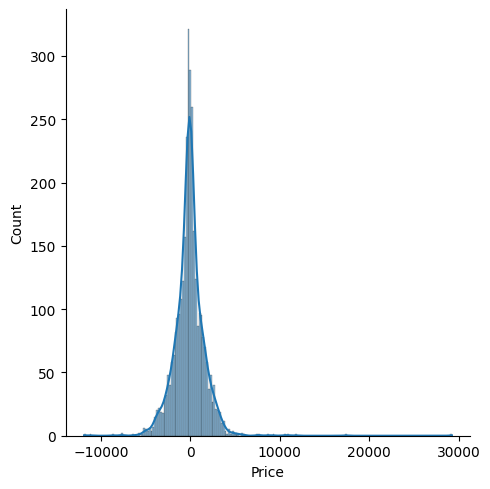

In [84]:
plt.figure(figsize = (8,8))
sb.displot(y_test-y_pred_xgb_hyp,kde=True)
plt.show()


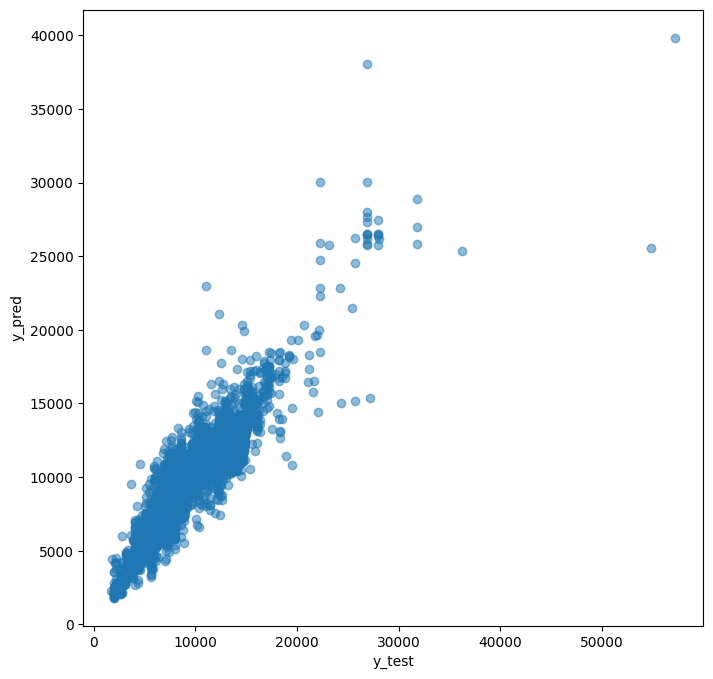

In [85]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, y_pred_xgb_hyp, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [86]:
pickle.dump(xgb_hyp,open('xgb_reg_flight_new.pkl', 'wb'))